## Customer Churn Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Data Loading and checking data 

In [5]:
# ------------------------------------------------------------
# 1. Load Dataset
# ------------------------------------------------------------

df = pd.read_csv("customer_churn_data.csv")

# Display first rows
print(df.head())

# Check structure
print(df.info())

# Check missing values
print(df.isnull().sum())

  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   
4   CUST0004    Male              1      No         No      25          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   
4               Yes             DSL                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service  

## Data Cleaning

In [8]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Checking and handling missing values
print(df["TotalCharges"].isnull().sum())

# Fill missing with median
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Strip spaces (if any)
df.columns = df.columns.str.strip()

print("Cleaning Done!")


0
Cleaning Done!


C:\Users\adeep\AppData\Local\Temp\ipykernel_360\2015894713.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


## Helper function to plot graph

In [16]:
# # ------------------------------------------------------------
# # Helper function for categorical variables
# # ------------------------------------------------------------
# def plot_count(col):
#     plt.figure(figsize=(6,4))
#     sns.countplot(data=df, x=col, palette="viridis")
#     plt.title(f"Count Plot of {col}")
#     plt.show()

# # ------------------------------------------------------------
# # Helper function for numerical variables
# # ------------------------------------------------------------
# def plot_hist(col):
#     plt.figure(figsize=(6,4))
#     sns.histplot(df[col], kde=True)
#     plt.title(f"Distribution of {col}")
#     plt.show()

# # ------------------------------------------------------------
# # Helper function: Churn vs any categorical variable
# # ------------------------------------------------------------
# def churn_bar(col):
#     plt.figure(figsize=(8,4))
#     sns.countplot(data=df, x=col, hue="Churn", palette="coolwarm")
#     plt.title(f"{col} vs Churn")
#     plt.show()


## VISUALIZATIONS

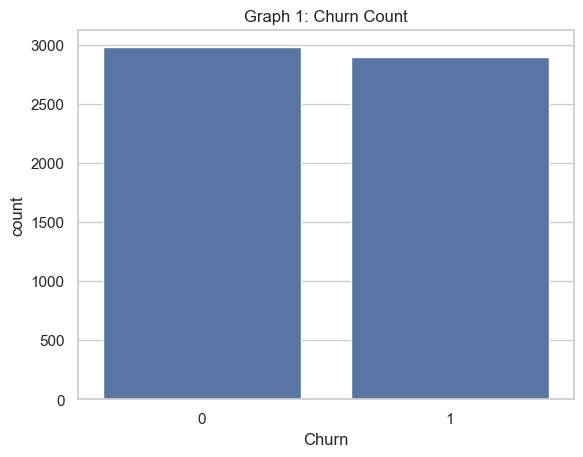

In [36]:
# Churn Count

sns.countplot(x="Churn", data=df)
plt.title("Graph 1: Churn Count")
plt.show()

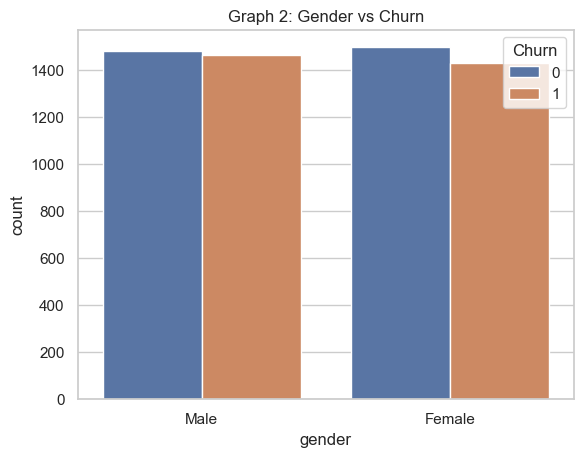

In [37]:
# Gender vs Churn

sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Graph 2: Gender vs Churn")
plt.show()

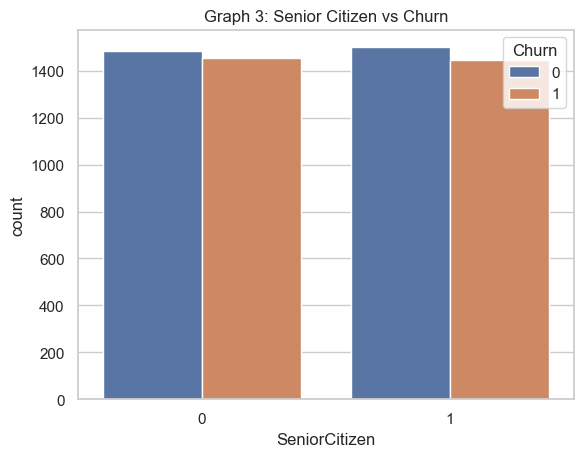

In [38]:
# Senior Citizen vs Churn

sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Graph 3: Senior Citizen vs Churn")
plt.show()

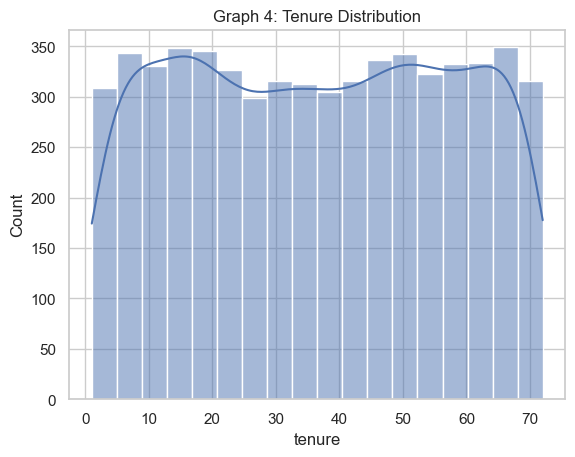

In [39]:
# Tenure Distribution

sns.histplot(df["tenure"], kde=True)
plt.title("Graph 4: Tenure Distribution")
plt.show()

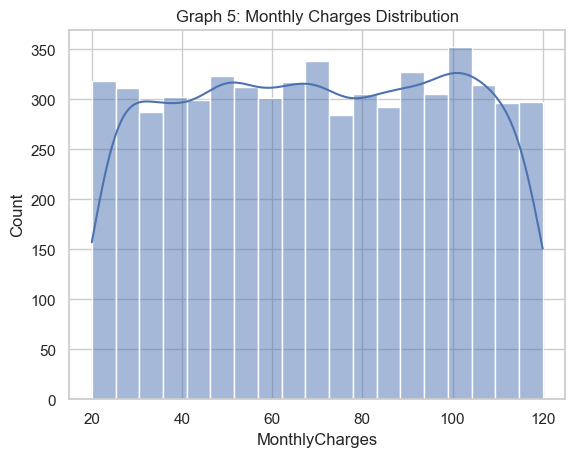

In [40]:
# Monthly Charges Distribution
sns.histplot(df["MonthlyCharges"], kde=True)
plt.title("Graph 5: Monthly Charges Distribution")
plt.show()

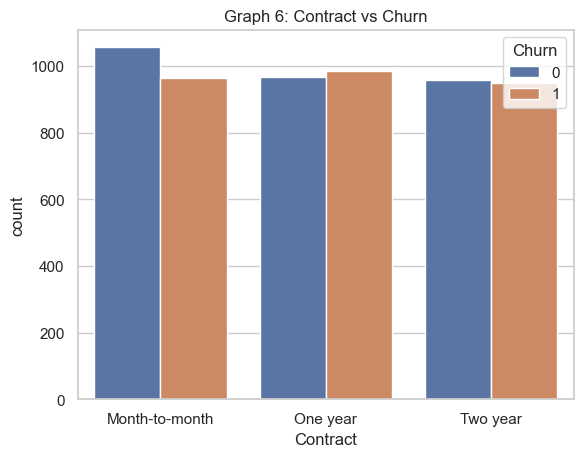

In [41]:
# Contract Type vs Churn
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Graph 6: Contract vs Churn")
plt.show()

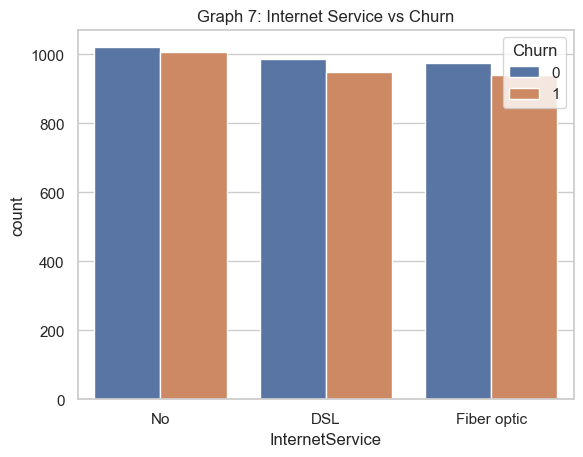

In [42]:
# Internet Service vs Churn
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Graph 7: Internet Service vs Churn")
plt.show()

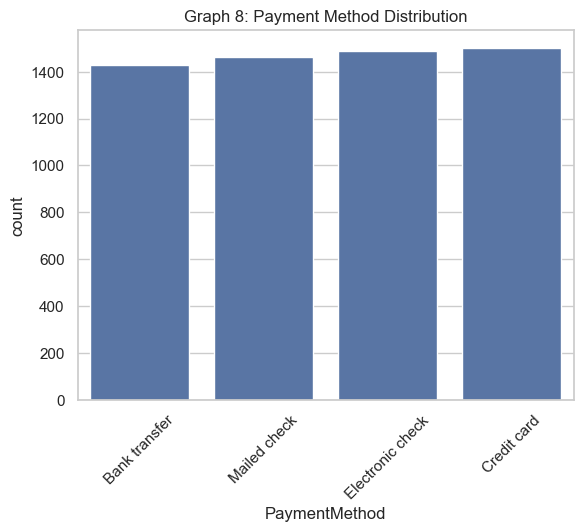

In [43]:
# Payment Method Count
sns.countplot(x="PaymentMethod", data=df)
plt.xticks(rotation=45)
plt.title("Graph 8: Payment Method Distribution")
plt.show()

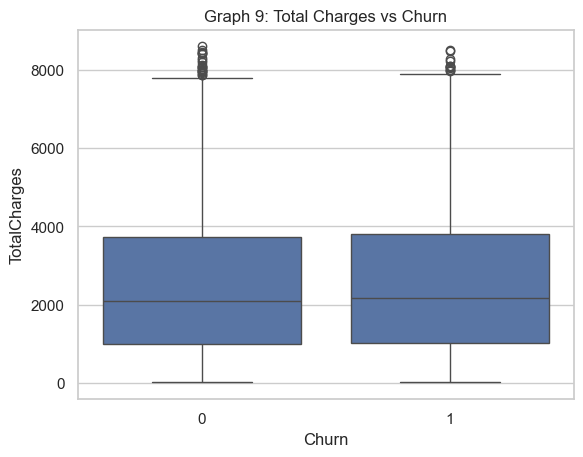

In [44]:
# Total Charges vs Churn
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Graph 9: Total Charges vs Churn")
plt.show()

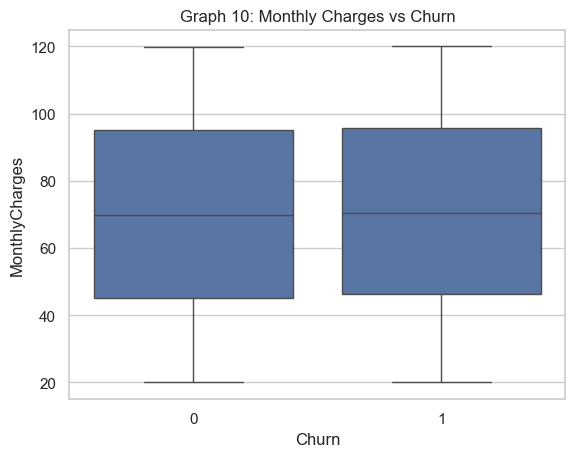

In [45]:
# Monthly Charges vs Churn
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Graph 10: Monthly Charges vs Churn")
plt.show()

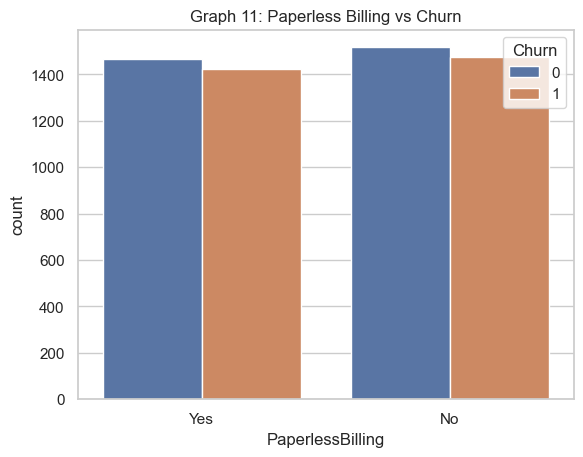

In [46]:
# Paperless Billing vs Churn
sns.countplot(x="PaperlessBilling", hue="Churn", data=df)
plt.title("Graph 11: Paperless Billing vs Churn")
plt.show()

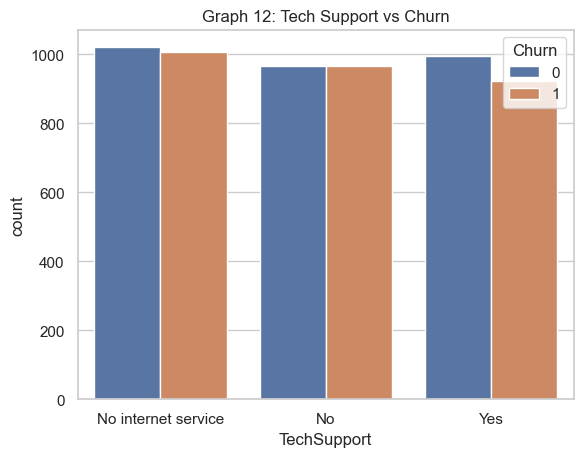

In [47]:
# Tech Support vs Churn
sns.countplot(x="TechSupport", hue="Churn", data=df)
plt.title("Graph 12: Tech Support vs Churn")
plt.show()

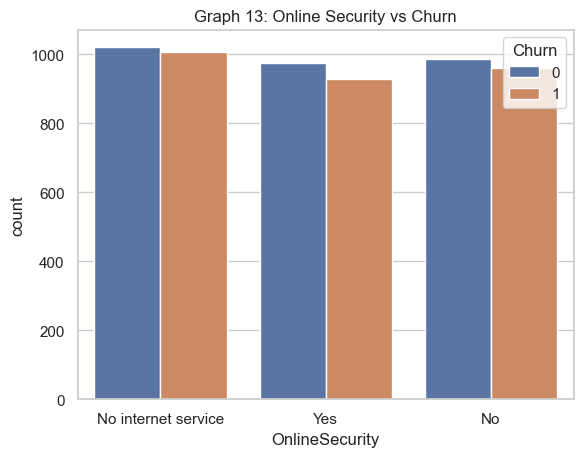

In [48]:
# Online Security vs Churn
sns.countplot(x="OnlineSecurity", hue="Churn", data=df)
plt.title("Graph 13: Online Security vs Churn")
plt.show()

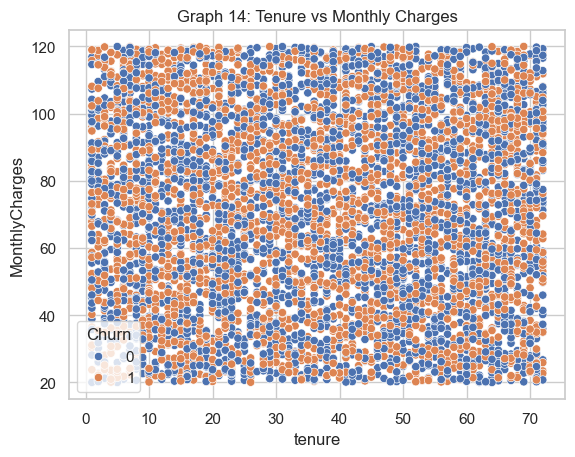

In [49]:
# Tenure vs Monthly Charges (Scatter)
sns.scatterplot(x="tenure", y="MonthlyCharges", hue="Churn", data=df)
plt.title("Graph 14: Tenure vs Monthly Charges")
plt.show()

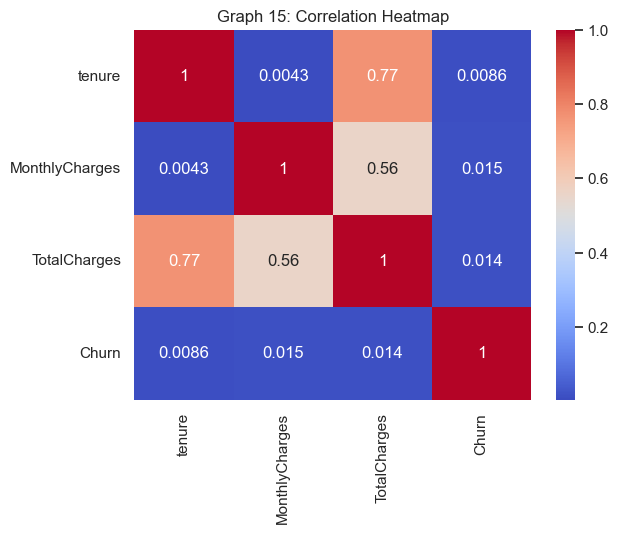

In [50]:
# Correlation Heatmap (Only numerical)
df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

num_df = df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].astype(float)
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Graph 15: Correlation Heatmap")
plt.show()
